<div style="text-align: center;">
    <h1> <font style="bold"> Trabajo Práctico 2 </font></h1>
    <h2><font style="bold">Especialización en Inteligencia Artificial</font></h2>
    <h2><font style="bold">Probabilidad y Estadistica</font></h2>
    <h3><font style="bold">Abril Noguera</font></h3>
</div>

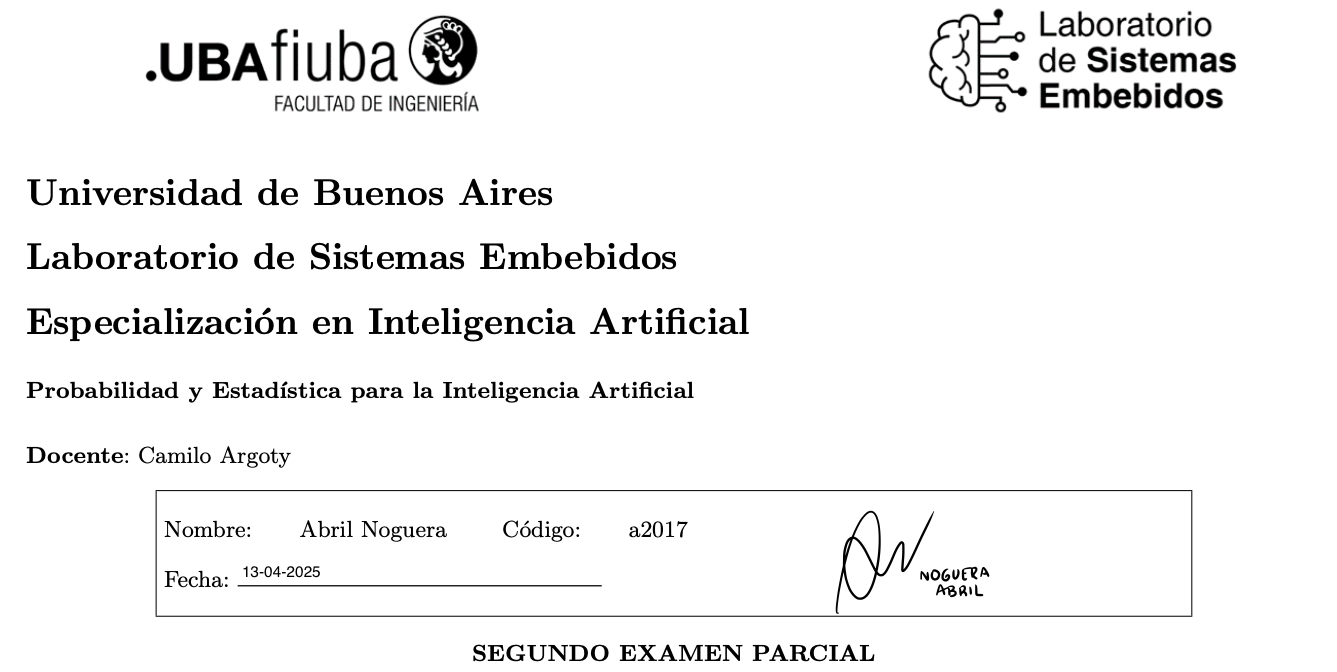

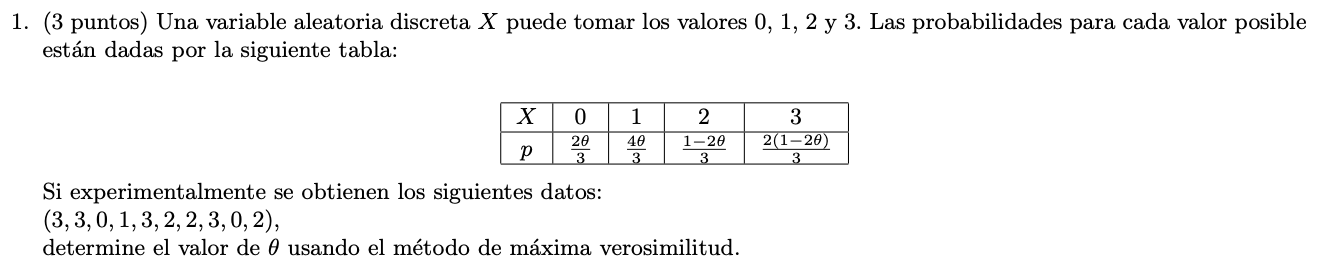

In [ ]:
import pandas as pd
import sympy as sp
from collections import Counter

# Variable simbólica
theta = sp.Symbol('theta', real=True, positive=True)

# Datos del problema
valores_x = [0, 1, 2, 3]

# Probabilidades asociadas a cada valor de X
p_simbolicas = [
    (2 * theta) / 3,
    (4 * theta) / 3,
    (1 - 2 * theta) / 3,
    (2 * (1 - 2 * theta)) / 3
]

# Crear un DataFrame
df = pd.DataFrame({
    'X': valores_x,
    'p(theta)': p_simbolicas
})

# Datos Originales
df


,X,p(theta)
0,0,2*theta/3
1,1,4*theta/3
2,2,1/3 - 2*theta/3
3,3,2/3 - 4*theta/3


In [ ]:
# Datos observados
datos = [3, 3, 0, 1, 3, 2, 2, 3, 0, 2]

# Contar la cantidad de veces que aparece cada valor
conteo = Counter(datos)
df['conteo'] = df['X'].map(conteo).fillna(0).astype(int)

# Columna: log(p(theta))
df["log(p(theta))"] = df["p(theta)"].apply(sp.log)

# Columna: conteo * log(p(theta))
df["conteo * log(p(theta))"] = df["conteo"] * df["log(p(theta))"]

# Columna: p(theta) ** conteo
df["p(theta)^conteo"] = df["p(theta)"] ** df["conteo"]

# Columna: verosimilitud parcial (producto individual)
df["verosimilitud parcial"] = df["p(theta)^conteo"]

# Mostramos proceso
df

,X,p(theta),conteo,log(p(theta)),conteo * log(p(theta)),p(theta)^conteo,verosimilitud parcial
0,0,2*theta/3,2,log(2*theta/3),2*log(2*theta/3),4*theta**2/9,4*theta**2/9
1,1,4*theta/3,1,log(4*theta/3),log(4*theta/3),4*theta/3,4*theta/3
2,2,1/3 - 2*theta/3,3,log(1/3 - 2*theta/3),3*log(1/3 - 2*theta/3),(1/3 - 2*theta/3)**3,(1/3 - 2*theta/3)**3
3,3,2/3 - 4*theta/3,4,log(2/3 - 4*theta/3),4*log(2/3 - 4*theta/3),(2/3 - 4*theta/3)**4,(2/3 - 4*theta/3)**4


In [16]:
# Calculamos la log-verosimilitud
log_likelihood = sum(df['conteo * log(p(theta))'])
log_likelihood_deriv = sp.diff(log_likelihood, theta)

# Resolvemos para encontrar el valor óptimo de theta
theta_mle = sp.solve(log_likelihood_deriv, theta)
print('θ = ', theta_mle[0])

θ =  3/20


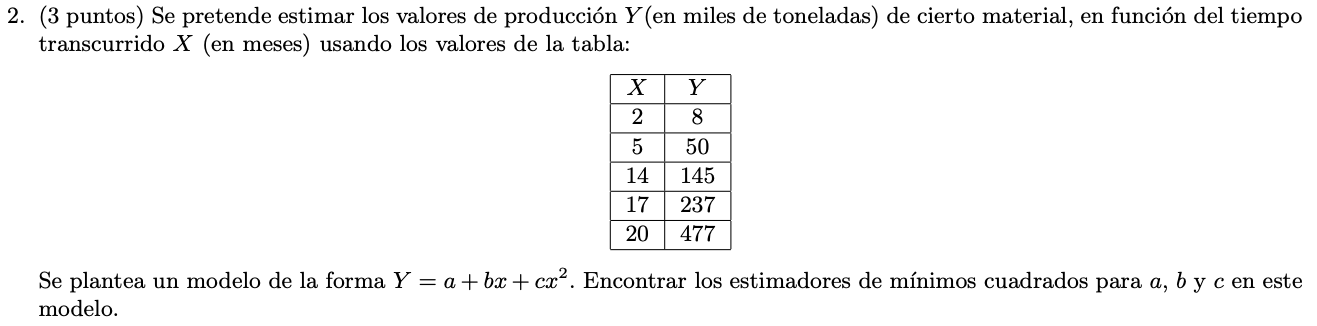

In [29]:
import numpy as np
# Datos proporcionados
X = np.array([2, 5, 14, 17, 20])  # meses
Y = np.array([8, 50, 145, 237, 477])  # miles de toneladas

## Solución Análitica

In [33]:
# Solución analítica de las ecuaciones normales
n = len(X)
sum_X = sum(X)
sum_X2 = sum(X**2)
sum_X3 = sum(X**3)
sum_X4 = sum(X**4)
sum_Y = sum(Y)
sum_XY = sum(X*Y)
sum_X2Y = sum(X**2 * Y)

# Matriz del sistema
M = np.array([
    [n, sum_X, sum_X2],
    [sum_X, sum_X2, sum_X3],
    [sum_X2, sum_X3, sum_X4]
])

# Vector de términos independientes
v = np.array([sum_Y, sum_XY, sum_X2Y])

# Resolvemos el sistema
a, b, c = np.linalg.solve(M, v)

print(f"Solución analítica:")
print(f"a = {a:.4f}")
print(f"b = {b:.4f}")
print(f"c = {c:.4f}")
print(f"Modelo estimado: Y = {a:.4f} + {b:.4f}X + {c:.4f}X²")

Solución analítica:
a = 83.6492
b = -27.2415
c = 2.2744
Modelo estimado: Y = 83.6492 + -27.2415X + 2.2744X²


## Solución con Statsmodels

In [39]:
import pandas as pd
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)    

# Creamos un DataFrame con los datos
data = pd.DataFrame({'X': X, 'Y': Y})

# Añadimos el término cuadrático
data['X²'] = data['X']**2

# Ajustamos el modelo
model = sm.OLS(data['Y'], sm.add_constant(data[['X', 'X²']]))
results = model.fit()

print(results.summary())
a = results.params['const']
b = results.params['X']
c = results.params['X²']

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     24.34
Date:                Tue, 08 Apr 2025   Prob (F-statistic):             0.0395
Time:                        20:22:01   Log-Likelihood:                -24.598
No. Observations:                   5   AIC:                             55.20
Df Residuals:                       2   BIC:                             54.02
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.6492     72.033      1.161      0.3

In [ ]:
print("Parámetros estimados:")
print(f"a = {a:.4f}")
print(f"b = {b:.4f}")
print(f"c = {c:.4f}")
print(f"Modelo estimado: Y = {a:.4f} + {b:.4f}X + {c:.4f}X²")


Parámetros estimados:
a = 83.6492
b = -27.2415
c = 2.2744
Modelo estimado: Y = 83.6492 + -27.2415X + 2.2744X²


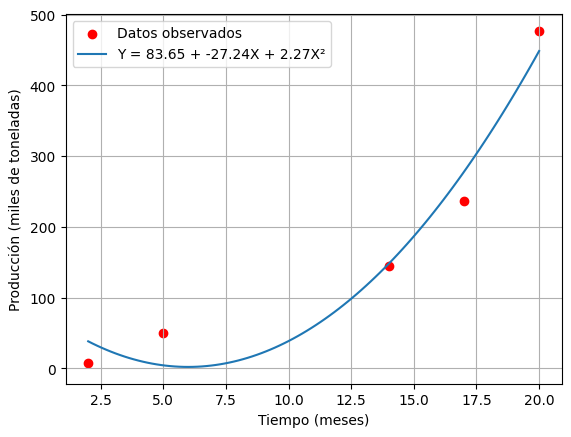

In [34]:
import matplotlib.pyplot as plt

# Generamos puntos para la curva ajustada
x_fit = np.linspace(X.min(), X.max(), 100)
y_fit = a + b*x_fit + c*x_fit**2

plt.scatter(X, Y, color='red', label='Datos observados')
plt.plot(x_fit, y_fit, label=f'Y = {a:.2f} + {b:.2f}X + {c:.2f}X²')
plt.xlabel('Tiempo (meses)')
plt.ylabel('Producción (miles de toneladas)')
plt.legend()
plt.grid(True)
plt.show()

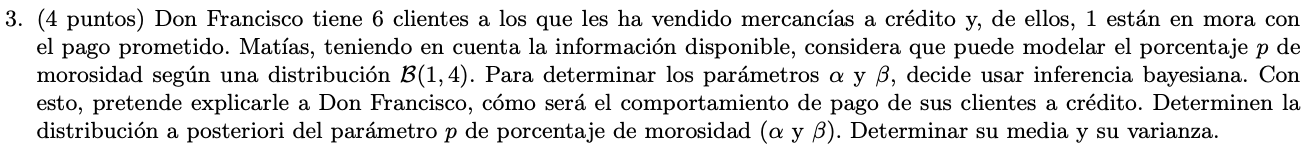

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Datos del Problema
n_clientes = 6
n_morosidad = 1

# Distribución a priori Beta(1, 4)
alpha_prior = 1
beta_prior = 4

# Media y Varianza a priori
media_prior = alpha_prior / (alpha_prior + beta_prior)
var_prior = (alpha_prior * beta_prior) / ((alpha_prior + beta_prior)**2 * (alpha_prior + beta_prior + 1))

print("Distribución a priori:")
print(f"Beta(α={alpha_prior}, β={beta_prior})")
print(f"Media a priori: {media_prior:.4f} ({media_prior*100:.2f}%)")
print(f"Varianza a priori: {var_prior:.6f}\n")

Distribución a priori:
Beta(α=1, β=4)
Media a priori: 0.2000 (20.00%)
Varianza a priori: 0.026667



In [36]:
# Actualización bayesiana para obtener la distribución a posteriori
alpha_post = alpha_prior + n_morosidad
beta_post = beta_prior + n_clientes - n_morosidad

# Media y Carianza a posteriori
media_post = alpha_post / (alpha_post + beta_post)
var_post = (alpha_post * beta_post) / ((alpha_post + beta_post)**2 * (alpha_post + beta_post + 1))

print("Distribución a posteriori:")
print(f"Beta(α={alpha_post}, β={beta_post})")
print(f"Media a posteriori: {media_post:.4f} ({media_post*100:.2f}%)")
print(f"Varianza a posteriori: {var_post:.6f}\n")

Distribución a posteriori:
Beta(α=2, β=9)
Media a posteriori: 0.1818 (18.18%)
Varianza a posteriori: 0.012397



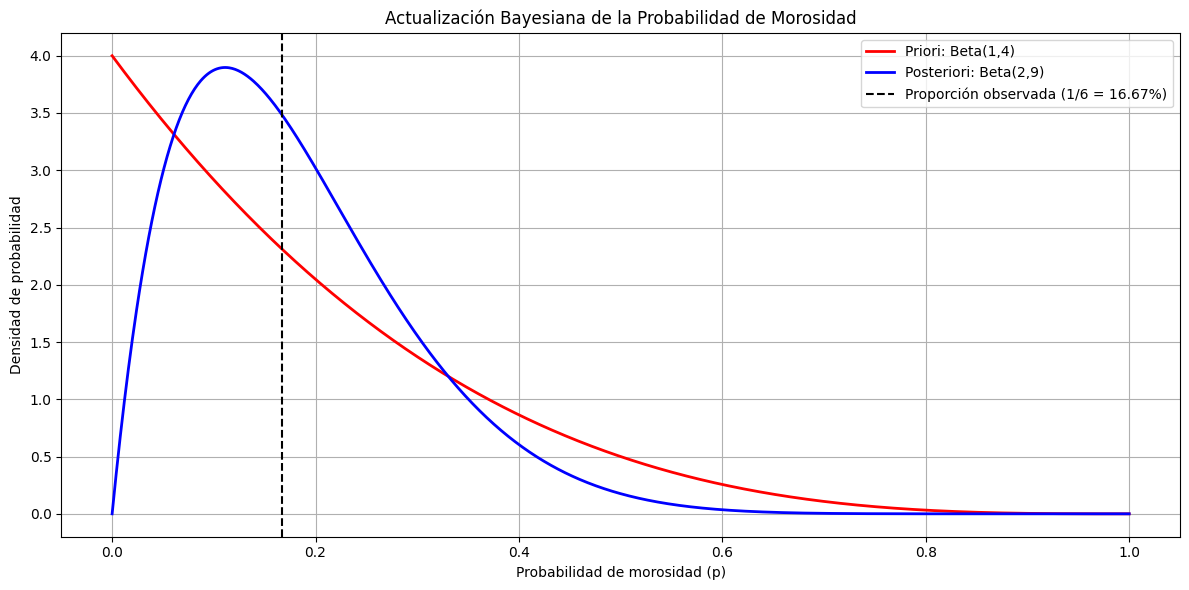

In [38]:
# Visualización comparativa
p = np.linspace(0, 1, 1000)

plt.figure(figsize=(12, 6))
plt.plot(p, beta.pdf(p, alpha_prior, beta_prior), 'r-', lw=2, label=f'Priori: Beta({alpha_prior},{beta_prior})')
plt.plot(p, beta.pdf(p, alpha_post, beta_post), 'b-', lw=2, label=f'Posteriori: Beta({alpha_post},{beta_post})')
plt.axvline(x=n_morosidad/n_clientes, color='k', linestyle='--', 
            label=f'Proporción observada ({n_morosidad}/{n_clientes} = {n_morosidad/n_clientes:.2%})')

plt.title('Actualización Bayesiana de la Probabilidad de Morosidad')
plt.xlabel('Probabilidad de morosidad (p)')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.tight_layout()

### Link al Notebook
Se puede encontrar el trabajo completo en el siguiente link: [Repositorio GitHub](https://github.com/abrilnoguera/MasterIA/tree/main/PEIA/TP2)